In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer_analysis = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [4]:
customer_analysis

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


### - check if there are highly correlated features and drop them if there are any.


In [5]:
customer_analysis = customer_analysis.drop_duplicates()

In [6]:
customer_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10497 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10497 non-null  object
 1   customer_lifetime_value        10497 non-null  int64 
 2   response                       10497 non-null  object
 3   coverage                       10497 non-null  object
 4   education                      10497 non-null  object
 5   effective_to_date              10497 non-null  object
 6   month                          10497 non-null  object
 7   employment_status              10497 non-null  object
 8   gender                         10497 non-null  object
 9   income                         10497 non-null  int64 
 10  location_code                  10497 non-null  object
 11  marital_status                 10497 non-null  object
 12  monthly_premium_auto           10497 non-null  int64 
 13  m

In [7]:
numerical_ca = customer_analysis.select_dtypes(include=np.number)
categorical_ca = customer_analysis.select_dtypes(include=object)

In [8]:
numerical_ca.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.004647,0.405120,0.009978,0.015377,-0.032876,0.018193,0.233147
income,0.004647,1.000000,-0.002723,-0.027081,0.005718,0.020390,-0.003419,-0.111306
monthly_premium_auto,0.405120,-0.002723,1.000000,0.009568,0.018286,-0.008153,-0.016667,0.630515
months_since_last_claim,0.009978,-0.027081,0.009568,1.000000,-0.033485,-0.000263,0.002536,0.012892
months_since_policy_inception,0.015377,0.005718,0.018286,-0.033485,1.000000,0.000990,-0.011724,0.004617
number_of_open_complaints,-0.032876,0.020390,-0.008153,-0.000263,0.000990,1.000000,-0.001499,-0.009570
number_of_policies,0.018193,-0.003419,-0.016667,0.002536,-0.011724,-0.001499,1.000000,-0.007458
total_claim_amount,0.233147,-0.111306,0.630515,0.012892,0.004617,-0.009570,-0.007458,1.000000


In [9]:
## customer_lifetime_value is slightly correlated with monthly_premium_auto, so I will drop this variable

In [10]:
numerical_ca = numerical_ca.drop(columns=["customer_lifetime_value"], inplace=False)

In [11]:
numerical_ca

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,48029,61,7,52,0,9,292
1,92260,64,3,26,0,1,744
2,22139,100,34,31,0,2,480
3,49078,97,10,3,0,2,484
4,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...
10684,61541,253,12,40,0,7,1214
10685,61146,65,7,68,0,6,273
10686,39837,201,11,63,0,2,381
10687,64195,158,0,27,4,6,618


### - One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).


In [12]:
pd.get_dummies(categorical_ca, drop_first=True)

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


### - for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.


array([[<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>],
       [<AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>],
       [<AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

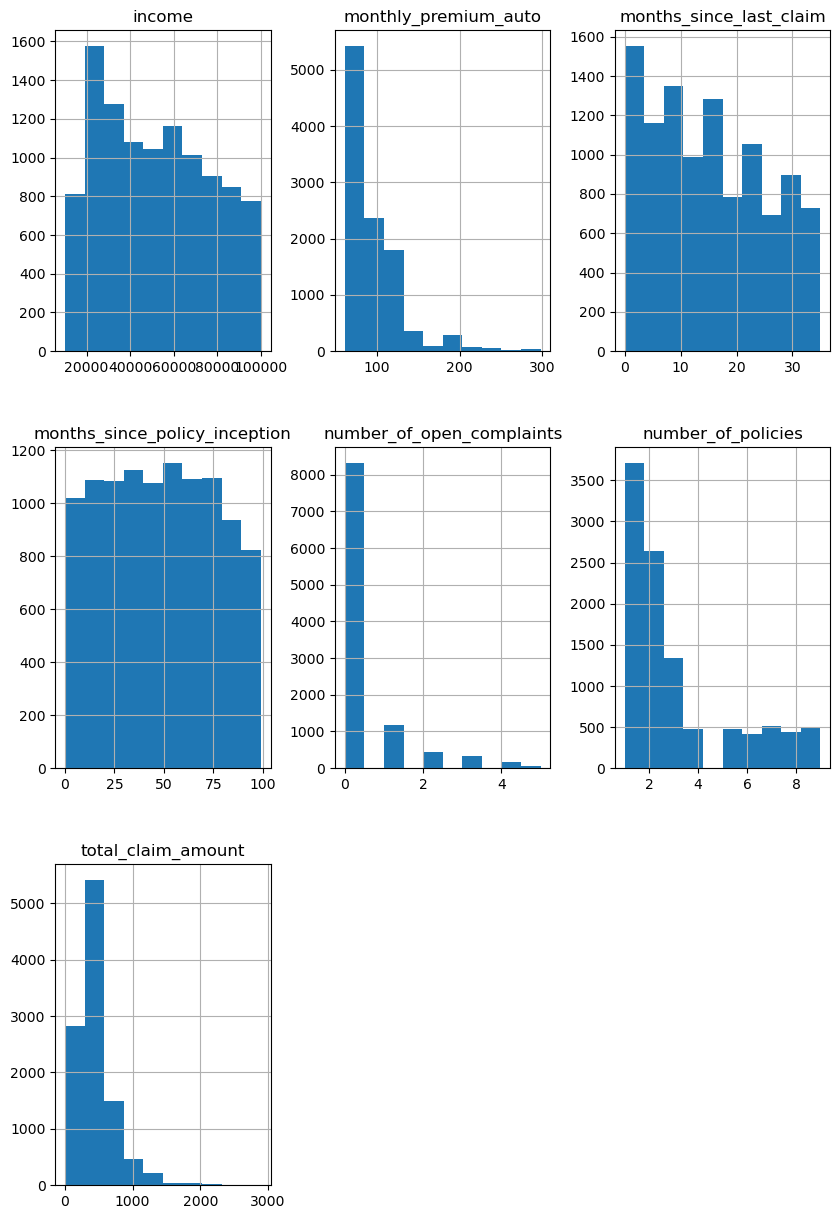

In [13]:
numerical_ca.hist(figsize=(10,15))

#### - Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has noticeably large skew (slanted with respect to the mean). For example, you might select customer_lifetime_value as a candidate varB which has skew.



In [14]:
varA = numerical_ca['income']

In [15]:
varB = numerical_ca['monthly_premium_auto']

#### 1. varA
- varA Use minmax transform to bring varA's values into the range [0,1]. 
-Check that varA has been rescaled using a distplot or a histagram

<AxesSubplot:>

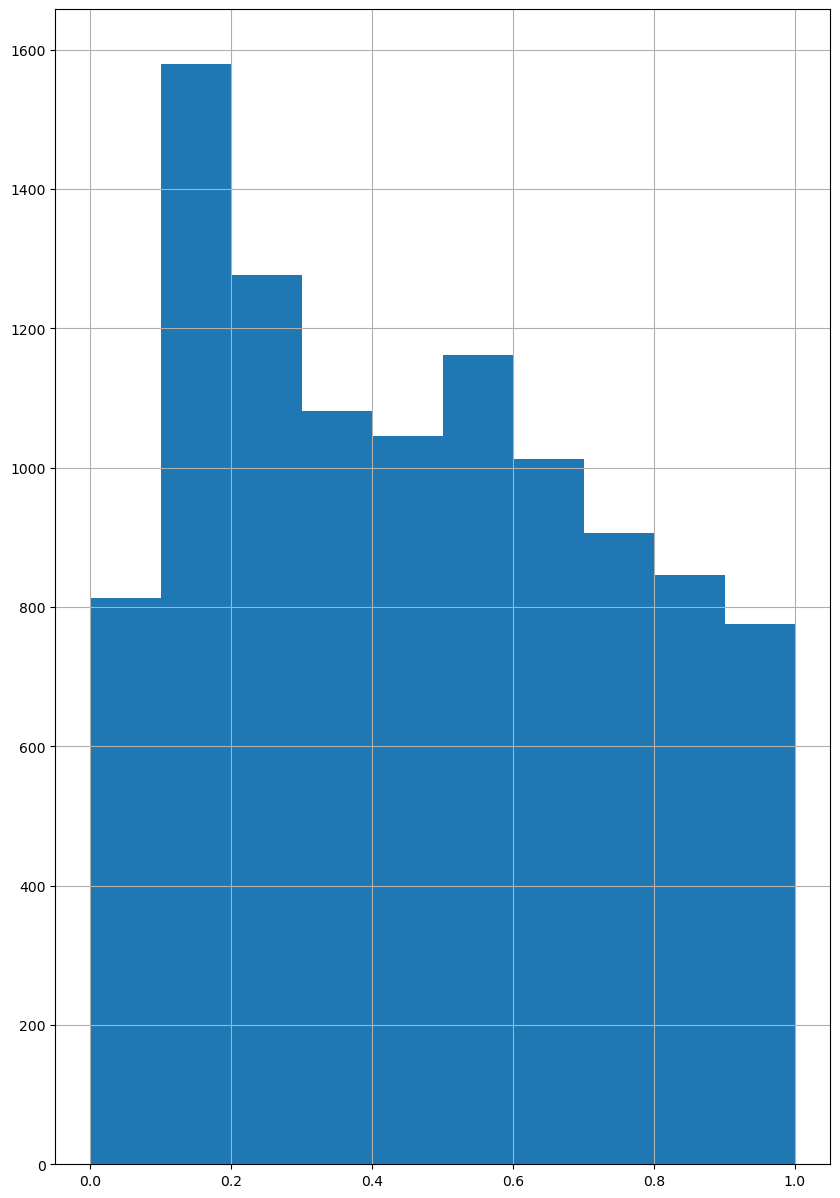

In [16]:
varA_std = (varA - varA.min(axis=0))/ (varA.max(axis=0) - varA.min(axis=0))

varA_std.hist(figsize=(10,15))

#### 2. varB
- Use StandardScalar or PowerTransform to reduce the skew and standardize varB's distribution.
- Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

Hints: 
- To reduce the skew and standardize a column, the PowerTransformer from sklearn has two options (box-cox and yeo-johnson). Try both and contrast the results.
- To rescale the column, use the minmax_scale transform.

Format the column correctly for the transformer. The sklearn transformers expect numpy.ndarrary object types as input. To take a pandas column and transform it into the correct form for PowerTransform and minmax_scalar use the to_numpy() and reshape(-1,1) methods.

In [17]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

In [18]:
pt = PowerTransformer()

In [19]:
sts = StandardScaler()

In [20]:
#varB=varB.to_numpy().reshape(-1,1)

In [21]:
sts.fit(numerical_ca[["monthly_premium_auto"]])
numerical_ca["mpa_standard_sc"] = sts.transform(numerical_ca[["monthly_premium_auto"]])

In [26]:
numerical_ca["mpa_standard_sc"].mean()

9.725424661507546e-17

In [27]:
numerical_ca["mpa_standard_sc"].std()

1.0000476360605115

<AxesSubplot:>

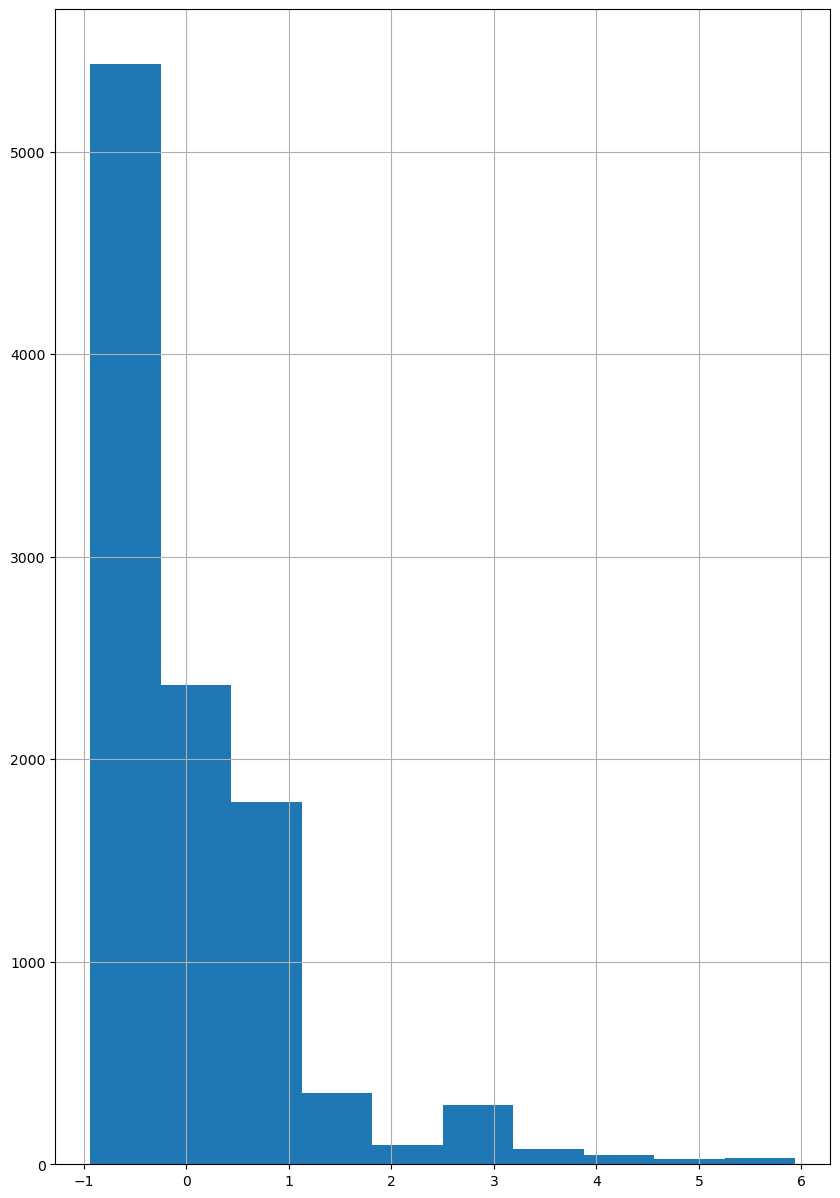

In [35]:
numerical_ca['mpa_standard_sc'].hist(figsize=(10,15))

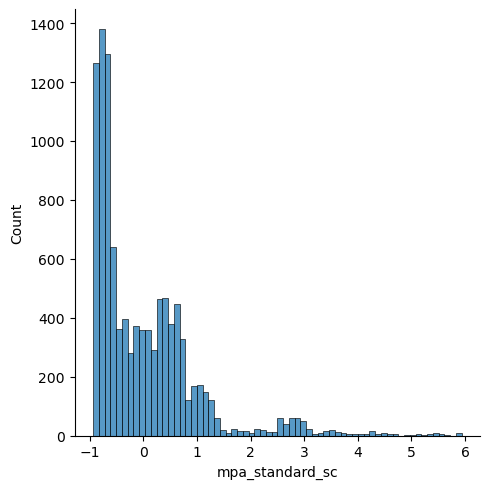

In [34]:
sns.displot(numerical_ca['mpa_standard_sc'])

In [38]:
pt.fit(numerical_ca[['monthly_premium_auto']])

numerical_ca["mpa_pt"] = pt.transform(numerical_ca[["monthly_premium_auto"]])

In [39]:
numerical_ca["mpa_pt"]

0       -1.542966
1       -1.257676
2        0.628234
3        0.534734
4        1.049461
           ...   
10684    2.152115
10685   -1.169690
10686    1.941418
10687    1.629692
10688    0.657889
Name: mpa_pt, Length: 10497, dtype: float64

In [40]:
numerical_ca["mpa_pt"].mean()

3.517203887594666e-14

In [41]:
numerical_ca["mpa_pt"].std()

1.0000476360605268

C:\Users\migue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpa_pt', ylabel='Density'>

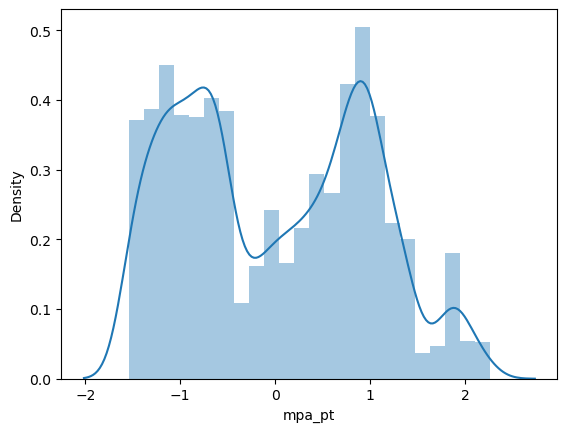

In [42]:
sns.distplot(numerical_ca["mpa_pt"])